In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import datasets
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import expon

In [9]:
happiness = pd.read_csv('dataset/world_happiness.csv', index_col=0)

In [10]:
happiness.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


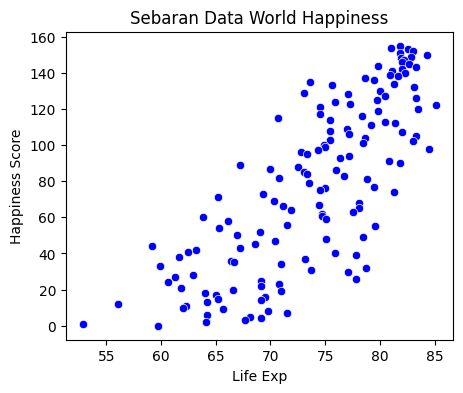

In [13]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=happiness, x='life_exp', y='happiness_score', color='blue')

plt.title('Sebaran Data World Happiness')
plt.xlabel('Life Exp')
plt.ylabel('Happiness Score')
plt.show()

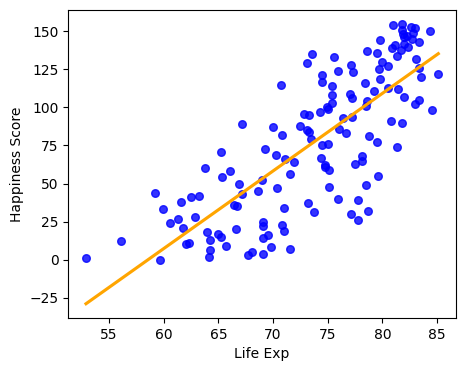

In [12]:
plt.figure(figsize=(5, 4))
sns.regplot(x='life_exp', y='happiness_score', data=happiness, ci=None, scatter_kws={'s': 30}, color='blue', line_kws={'color': 'orange'})

plt.xlabel("Life Exp")
plt.ylabel("Happiness Score")
plt.show()

Correlation between life expectancy and happiness score: 0.7019547642148012


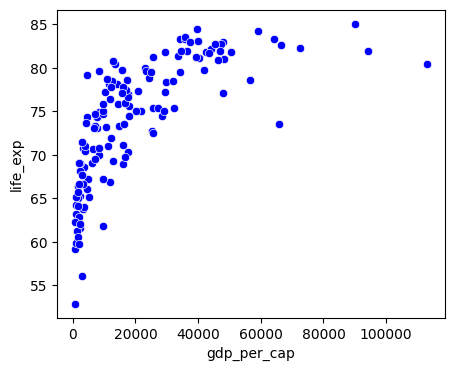

In [20]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=happiness, x='gdp_per_cap', y='life_exp', color='blue')

plt.xlabel('gdp_per_cap')
plt.ylabel('life_exp')

correlation = np.corrcoef(happiness['gdp_per_cap'], happiness['life_exp'])[0, 1]
print("Correlation between life expectancy and happiness score:", correlation)

Correlation between life expectancy and happiness score: 0.727973301222298


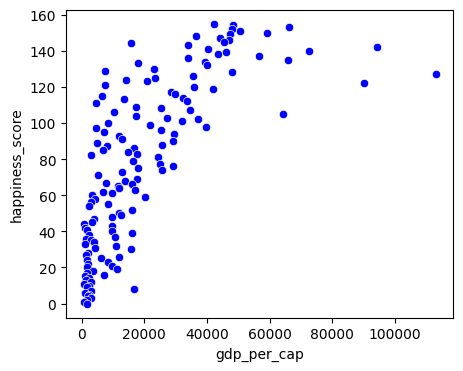

In [24]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=happiness, x='gdp_per_cap', y='happiness_score', color='blue')

plt.xlabel('gdp_per_cap')
plt.ylabel('happiness_score')

correlation = np.corrcoef(happiness['gdp_per_cap'], happiness['happiness_score'])[0, 1]
print("Correlation between life expectancy and happiness score:", correlation)

Correlation between life expectancy and happiness score: 0.8043146004918288


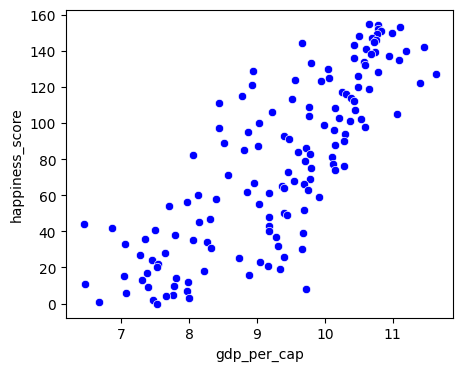

In [25]:
happiness['log_gdp_per_cap'] = np.log(happiness['gdp_per_cap'])

plt.figure(figsize=(5, 4))
sns.scatterplot(data=happiness, x='log_gdp_per_cap', y='happiness_score', color='blue')

plt.xlabel('gdp_per_cap')
plt.ylabel('happiness_score')

correlation = happiness.loc[:, 'log_gdp_per_cap'].corr(happiness.loc[:, 'happiness_score'])
print("Correlation between life expectancy and happiness score:", correlation)

In [28]:
sugar_happiness = pd.read_csv('dataset/world_happiness_add_sugar.csv', index_col=0)

In [29]:
sugar_happiness

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score,grams_sugar_per_day
Unnamed: 0,,,,,,,,,
1,Finland,2,5,4.0,47,42400,81.8,155,86.8
2,Denmark,4,6,3.0,22,48300,81.0,154,152.0
3,Norway,3,3,8.0,11,66300,82.6,153,120.0
4,Iceland,1,7,45.0,3,47900,83.0,152,132.0
5,Netherlands,15,19,12.0,7,50500,81.8,151,122.0
...,...,...,...,...,...,...,...,...,...
129,Yemen,100,147,83.0,155,2340,68.1,5,77.9
130,Rwanda,144,21,2.0,90,2110,69.1,4,14.1
131,Tanzania,131,78,34.0,49,2980,67.7,3,28.0


Correlation between life expectancy and happiness score: 0.6939100021829633


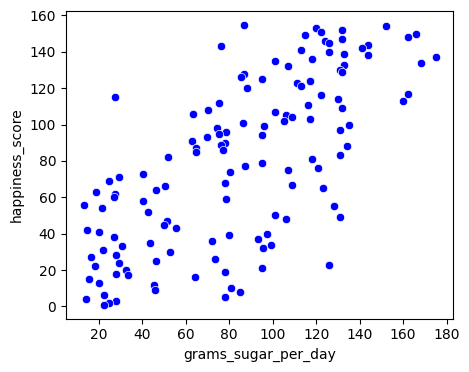

In [32]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=sugar_happiness, x='grams_sugar_per_day', y='happiness_score', color='blue')

plt.xlabel('grams_sugar_per_day')
plt.ylabel('happiness_score')

correlation = np.corrcoef(sugar_happiness['grams_sugar_per_day'], sugar_happiness['happiness_score'])[0, 1]
print("Correlation between life expectancy and happiness score:", correlation)

In [33]:
data_amir = pd.read_csv('dataset/amir_deals.csv', index_col=0)

In [34]:
data_amir.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


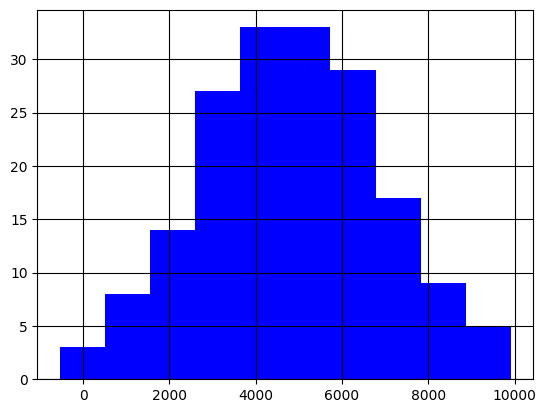

In [38]:
plt.hist(data_amir['amount'], bins=10, color='blue')
plt.grid(True, color='black')
plt.show()

In [39]:
probability_below_7500 = norm.cdf(7500, loc=5000, scale=2000)
print(f"Peluang kurang dari 7500: {probability_below_7500}")

probability_above_1000 = norm.sf(1000, loc=5000, scale=2000)
print(f"Peluang lebih dari 1000: {probability_above_1000}")

probability_3000_to_7000 = norm.cdf(7000, loc=5000, scale=2000) - norm.cdf(3000, loc=5000, scale=2000)
print(f"Peluang antara 3000 dan 7000: {probability_3000_to_7000}")

threshold_25_percent = norm.ppf(0.25, loc=5000, scale=2000)
print(f"Nilai batas untuk 25% kesepakatan: {threshold_25_percent}")

Peluang kurang dari 7500: 0.8943502263331446
Peluang lebih dari 1000: 0.9772498680518208
Peluang antara 3000 dan 7000: 0.6826894921370859
Nilai batas untuk 25% kesepakatan: 3651.0204996078364


Text(0.5, 1.0, 'Histogram of Simulated Sales Updated')

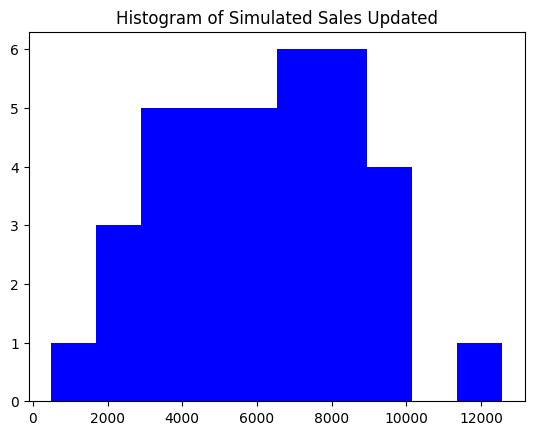

In [63]:
mean_updated = 5000 * 1.2
sd_updated = 2000 * 1.3

sales_updated = norm.rvs(loc=mean_updated, scale=sd_updated, size=36)

plt.hist(sales_updated, bins=10, color='blue')
plt.title('Histogram of Simulated Sales Updated')

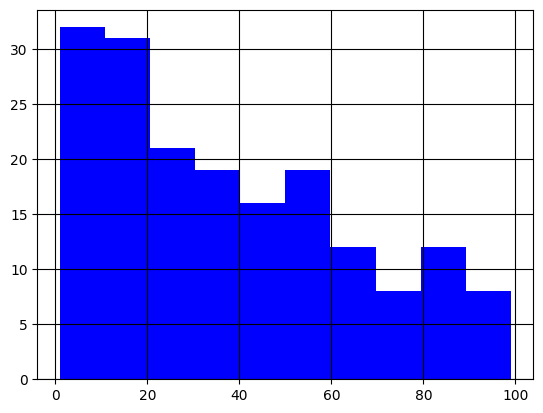

In [64]:
plt.hist(data_amir['num_users'], bins=10, color='blue')
plt.grid(True, color='black')
plt.show()

32.0


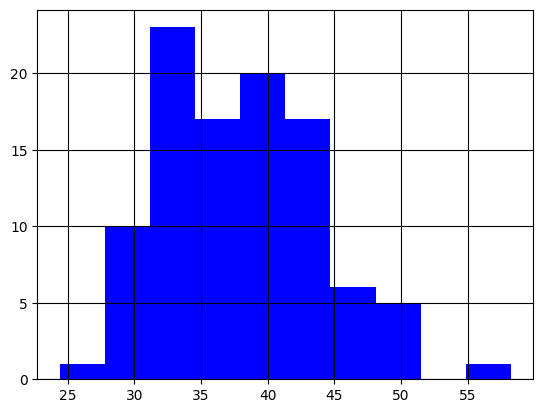

In [68]:
np.random.seed(104)

sample_20 = data_amir['num_users'].sample(n=20, replace=True)

mean_sample_20 = sample_20.mean()
print(mean_sample_20)

means_list = []

for _ in range(100):
    sample_20 = data_amir['num_users'].sample(n=20, replace=True)
    means_list.append(sample_20.mean())
    
means_series = pd.Series(means_list)
plt.hist(means_series, bins=10, color='blue')
plt.grid(True, color='black')
plt.show()

In [69]:
data_deals = pd.read_csv('dataset/all_deals.csv', index_col=0)

In [70]:
data_deals.head()

,product,num_users
Unnamed: 0,,
1,3544,19
2,5073,43
3,6149,87
4,7863,83
5,14,17


In [80]:
np.random.seed(321)

means_of_samples = []

for _ in range(30):
    sample = data_deals['num_users'].sample(n=20, replace=True)
    mean_of_sample = sample.mean()
    means_of_samples.append(mean_of_sample)
    
print(f"Rata-rata dari rata-rata sample : ", np.mean(means_of_samples))
print(f"Rata-rata keseluruhan data      : ", data_deals['num_users'].mean())

Rata-rata dari rata-rata sample :  38.31333333333332
Rata-rata keseluruhan data      :  37.23919226393629


In [86]:
# Menghitung probabilitas 5 respon dengan rata-rata 4
prob_5_responses = poisson.pmf(k=5, mu=4)
print(f"Probabilitas 5 respon dengan rata-rata 4   : {prob_5_responses}")

# Menghitung probabilitas 5 respon dengan rata-rata 5.5
prob_5_responses_5_5_mean = poisson.pmf(k=5, mu=5.5)
print(f"Probabilitas 5 respon dengan rata-rata 5.5 : {prob_5_responses_5_5_mean}")

# Menghitung probabilitas untuk 2 respon atau kurang dengan rata-rata 4
prob_no_more_than_2 = poisson.cdf(k=2, mu=4)
print(f"Probabilitas di bawah atau sama dengan 2 jika rata-rata 4 : {prob_no_more_than_2}")

# Menghitung probabilitas untuk lebih dari 10 respon dengan rata-rata 4
prob_more_than_10 = 1 - poisson.cdf(k=10, mu=4)
print(f"Probabilitas lebih dari 10 respon jika rata-rata 4        : {prob_more_than_10}")

Probabilitas 5 respon dengan rata-rata 4   : 0.1562934518505317
Probabilitas 5 respon dengan rata-rata 5.5 : 0.17140068409793663
Probabilitas di bawah atau sama dengan 2 jika rata-rata 4 : 0.23810330555354436
Probabilitas lebih dari 10 respon jika rata-rata 4        : 0.0028397661205137315


In [91]:
from scipy.stats import expon
import scipy.stats as stats

scale_param = 0.4
# Hitung peluang respons dalam waktu kurang dari 1 jam
prob_less_than_1 = expon.cdf(1, scale_param)
print(f"peluang respons kurang dari 1 jam  : {prob_less_than_1}")

# Hitung peluang respons dalam waktu lebih dari 4 jam
prob_more_than_4 = expon.sf(4, scale_param)
print(f"peluang respons lebih dari 4 jam   : {prob_more_than_4}")

# Hitung peluang respons antara 3 dan 4 jam
prob_between_3_and_4 = expon.cdf(4, scale_param) - expon.cdf(3, scale_param)
print(f"peluang respons antara 3 dan 4 jam : {prob_between_3_and_4}")

peluang respons kurang dari 1 jam  : 0.4511883639059735
peluang respons lebih dari 4 jam   : 0.02732372244729256
peluang respons antara 3 dan 4 jam : 0.04694985576704136
